In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from scipy import stats

In [ ]:
file_path = "mydata.csv"

df_epl_stats = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohamadsallah5/english-premier-league-stats20212024",
  file_path
)

/tmp/ipython-input-2296112268.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_epl_stats = kagglehub.load_dataset(


In [ ]:
print(df_epl_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1140 non-null   object 
 1   clock             1140 non-null   object 
 2   stadium           1140 non-null   object 
 3   class             1140 non-null   object 
 4   attendance        1140 non-null   object 
 5   Home Team         1140 non-null   int64  
 6   Goals Home        1140 non-null   int64  
 7   Away Team         1140 non-null   int64  
 8   Away Goals        1140 non-null   int64  
 9   home_possessions  1140 non-null   float64
 10  away_possessions  1140 non-null   float64
 11  home_shots        1140 non-null   int64  
 12  away_shots        1140 non-null   int64  
 13  home_on           1140 non-null   int64  
 14  away_on           1140 non-null   int64  
 15  home_off          1140 non-null   int64  
 16  away_off          1140 non-null   int64  


In [ ]:
print(df_epl_stats.columns)

Index(['date', 'clock', 'stadium', 'class', 'attendance', 'Home Team',
       'Goals Home', 'Away Team', 'Away Goals', 'home_possessions',
       'away_possessions', 'home_shots', 'away_shots', 'home_on', 'away_on',
       'home_off', 'away_off', 'home_blocked', 'away_blocked', 'home_pass',
       'away_pass', 'home_chances', 'away_chances', 'home_corners',
       'away_corners', 'home_offside', 'away_offside', 'home_tackles',
       'away_tackles', 'home_duels', 'away_duels', 'home_saves', 'away_saves',
       'home_fouls', 'away_fouls', 'home_yellow', 'away_yellow', 'home_red',
       'away_red', 'links'],
      dtype='object')


In [ ]:
print(df_epl_stats.head(5))

            date   clock                  stadium class attendance  Home Team  \
0  28th May 2023  4:30pm         Emirates Stadium     h     60,095          2   
1  28th May 2023  4:30pm               Villa Park     h     42,212          7   
2  28th May 2023  4:30pm  Gtech Community Stadium     h     17,120          9   
3  28th May 2023  4:30pm          Stamford Bridge     d     40,130         12   
4  28th May 2023  4:30pm            Selhurst Park     d     25,198         11   

   Goals Home  Away Team  Away Goals  home_possessions  ...  away_duels  \
0           5         13           0              51.0  ...        52.2   
1           2          6           1              40.3  ...        47.8   
2           1          1           0              34.4  ...        50.0   
3           1          4           1              64.4  ...        45.5   
4           1         16           1              66.0  ...        41.7   

   home_saves  away_saves  home_fouls  away_fouls  home_yellow

In [ ]:
print(df_epl_stats['Goals Home'].value_counts())

Goals Home
1    374
0    285
2    254
3    135
4     58
5     20
6      8
7      4
9      2
Name: count, dtype: int64


In [ ]:
print(df_epl_stats.tail(5))

            date    clock         stadium class attendance  Home Team  \
1135  13/09/2020   2:00pm   The Hawthorns     a          0         24   
1136   12/9/2020   8:00pm  London Stadium     a          0         14   
1137   12/9/2020   5:30pm         Anfield     h          0          5   
1138   12/9/2020   3:00pm   Selhurst Park     h          0         11   
1139   12/9/2020  12:30pm  Craven Cottage     a          0         10   

      Goals Home  Away Team  Away Goals  home_possessions  ...  away_duels  \
1135           0         18           3              35.8  ...        36.0   
1136           0          4           2              58.3  ...        59.5   
1137           4         19           3              48.8  ...        46.2   
1138           1         20           0              29.4  ...        50.0   
1139           0          2           3              45.6  ...        46.7   

      home_saves  away_saves  home_fouls  away_fouls  home_yellow  \
1135           4       

In [ ]:
print(df_epl_stats.describe())

         Home Team   Goals Home    Away Team   Away Goals  home_possessions  \
count  1140.000000  1140.000000  1140.000000  1140.000000       1140.000000   
mean     11.450000     1.502632    11.450000     1.290351         50.816754   
std       6.815784     1.359450     6.815784     1.233457         12.896181   
min       1.000000     0.000000     1.000000     0.000000         17.900000   
25%       5.750000     0.750000     5.750000     0.000000         40.900000   
50%      11.000000     1.000000    11.000000     1.000000         50.850000   
75%      17.250000     2.000000    17.250000     2.000000         60.900000   
max      25.000000     9.000000    25.000000     7.000000         82.400000   

       away_possessions   home_shots   away_shots      home_on      away_on  \
count       1140.000000  1140.000000  1140.000000  1140.000000  1140.000000   
mean          49.205965    13.558772    11.474561     4.715789     4.039474   
std           12.899495     5.615658     5.048515  

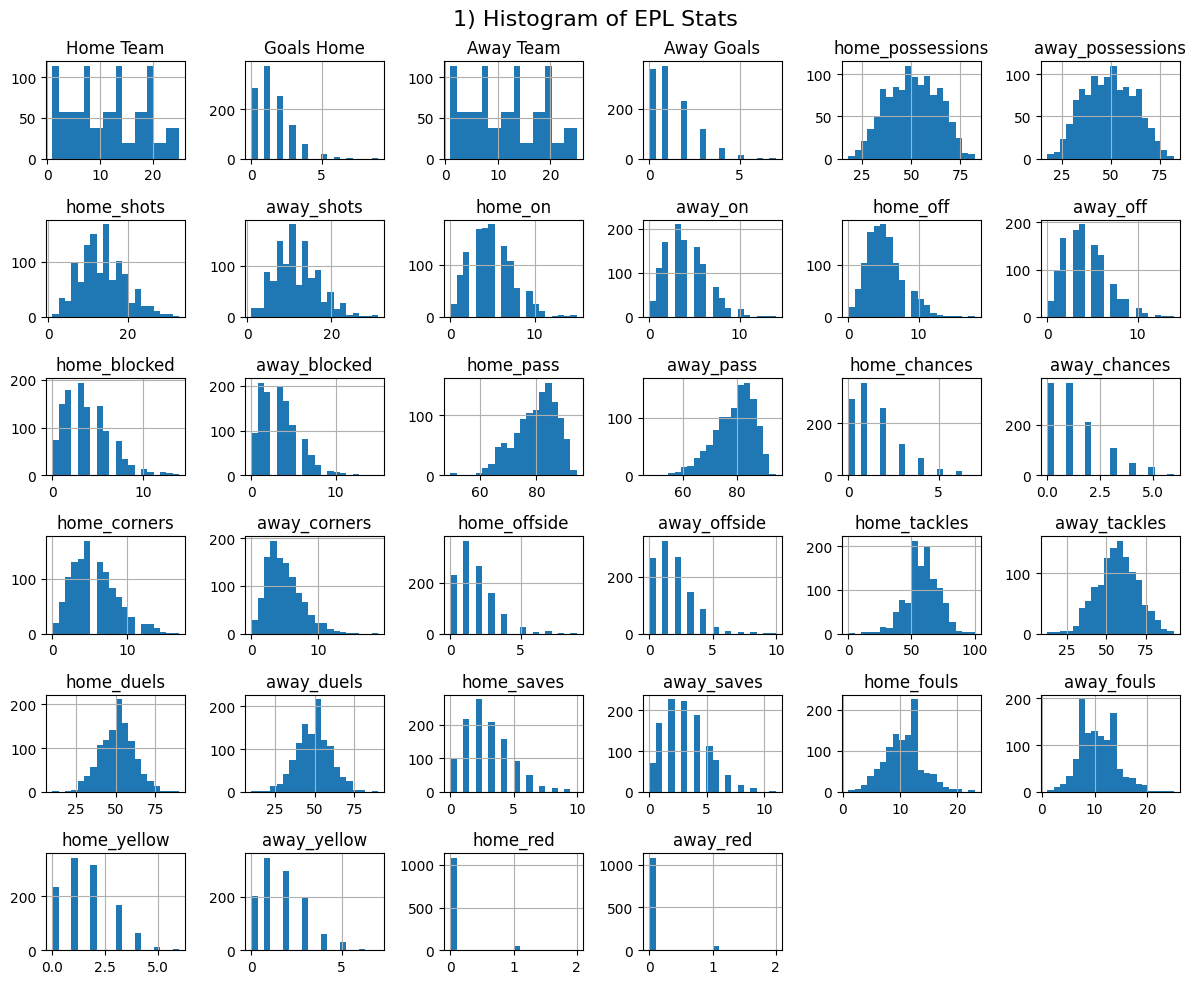

In [ ]:
df_epl_stats.hist(figsize=(12,10), bins=20)
plt.suptitle('1) Histogram of EPL Stats', fontsize=16)
plt.tight_layout()
plt.show()

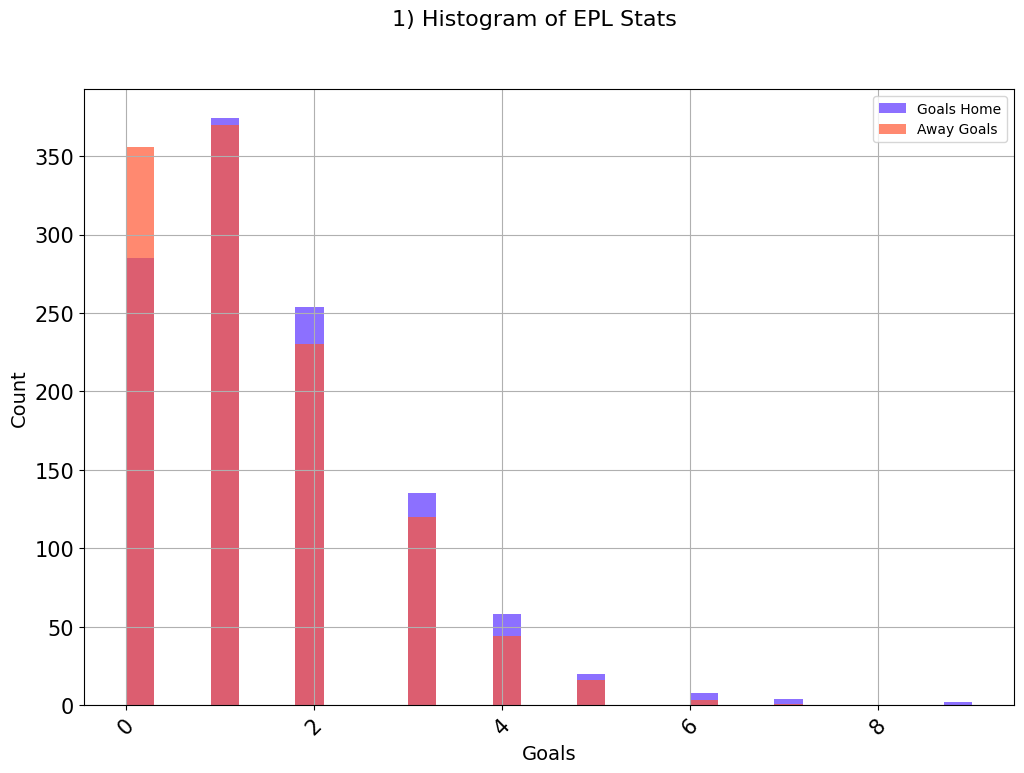

In [ ]:
df_epl_stats[['Goals Home','Away Goals']].plot(kind='hist',
  alpha=0.7,
  bins=30,
  rot=45,
  grid=True,
  figsize=(12,8),
  fontsize=15,
  color=['#5C33FF', '#FF5733'])
plt.suptitle('1) Histogram of EPL Stats', fontsize=16)
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Bisa dilihat bahwa terdapat banyak pertandingan di mana tim tamu gagal mencetak satu pun gol di kandang musuh (ada lebih dari 350 pertandingan). Jika kita lihat, tim tamu selalu lebih unggul dalam jumlah pertandingan mencetak gol lebih dari 0

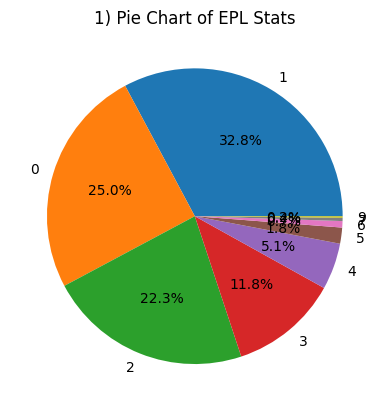

In [ ]:
plt.pie(df_epl_stats['Goals Home'].value_counts(), labels=df_epl_stats['Goals Home'].value_counts().index, autopct='%1.1f%%')
plt.title('1) Pie Chart of EPL Stats')
plt.show()

Persentase tim tuan rumah mampu mencetak setidaknya 1 gol adalah yang paling besar, yaitu sebesar 32,8%

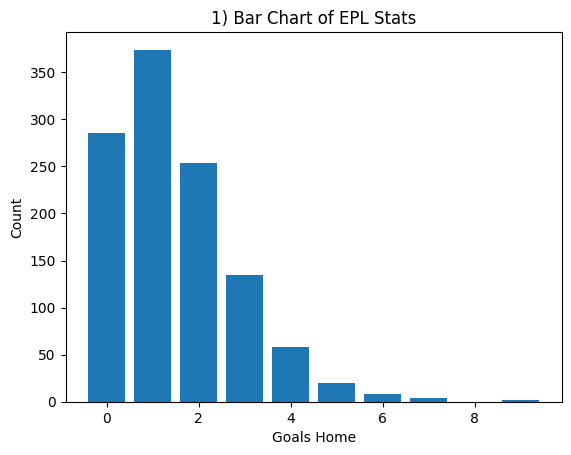

In [ ]:
plt.bar(df_epl_stats['Goals Home'].value_counts().index, df_epl_stats['Goals Home'].value_counts())
plt.ylabel('Count')
plt.xlabel('Goals Home')
plt.title('1) Bar Chart of EPL Stats')
plt.show()

Bisa dilihat pada diagram batang ini, tim tuan rumah mampu setidaknya mencetak 1 gol pada lebih dari 350 pertandingan

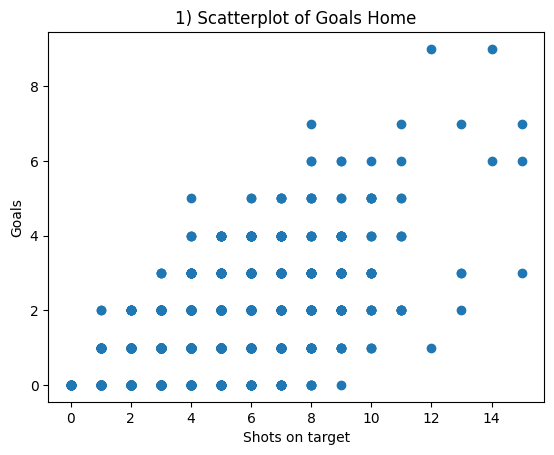

In [ ]:
plt.scatter(df_epl_stats['home_on'], df_epl_stats['Goals Home'])
plt.xlabel('Shots on target')
plt.ylabel('Goals')
plt.title('1) Scatterplot of Goals Home')
plt.show()

Jika kita lihat pada visualisasi di atas, terdapat sebuah anomali, yaitu ada pertandingan, di mana tim tuan rumah melepaskan 4 shots on target, tapi gol yang dihasilkan oleh tim tuan rumah pada pertandingan sebanyak 5 gol. Ini bisa saja terjadi, jika salah satu gol tersebut dicetak oleh pemain lawan ke gawangnya sendiri alias gol bunuh diri. Dalam peraturan, gol bunuh diri tidak dihitung sebagai shots on target apabila tidak ada intensi bola ditendang ke arah gawang.

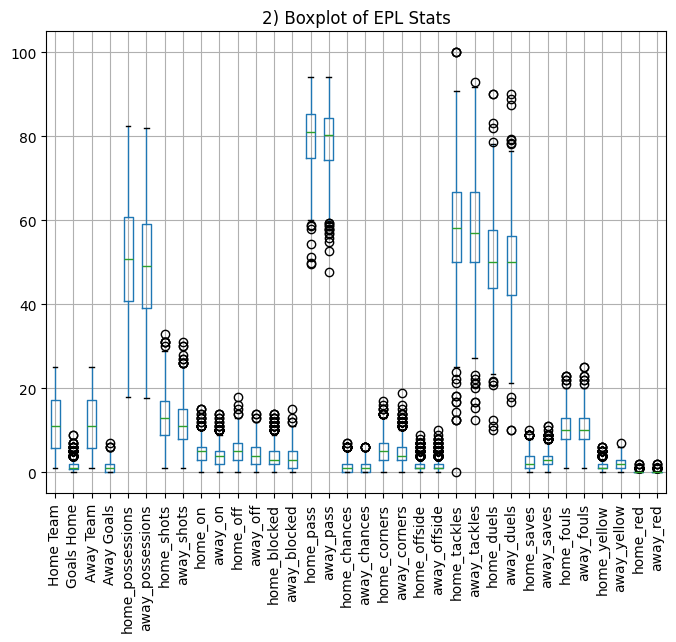

In [ ]:
df_epl_stats.boxplot(figsize=(8,6))
plt.title('2) Boxplot of EPL Stats')
plt.xticks(rotation=90)
plt.show()

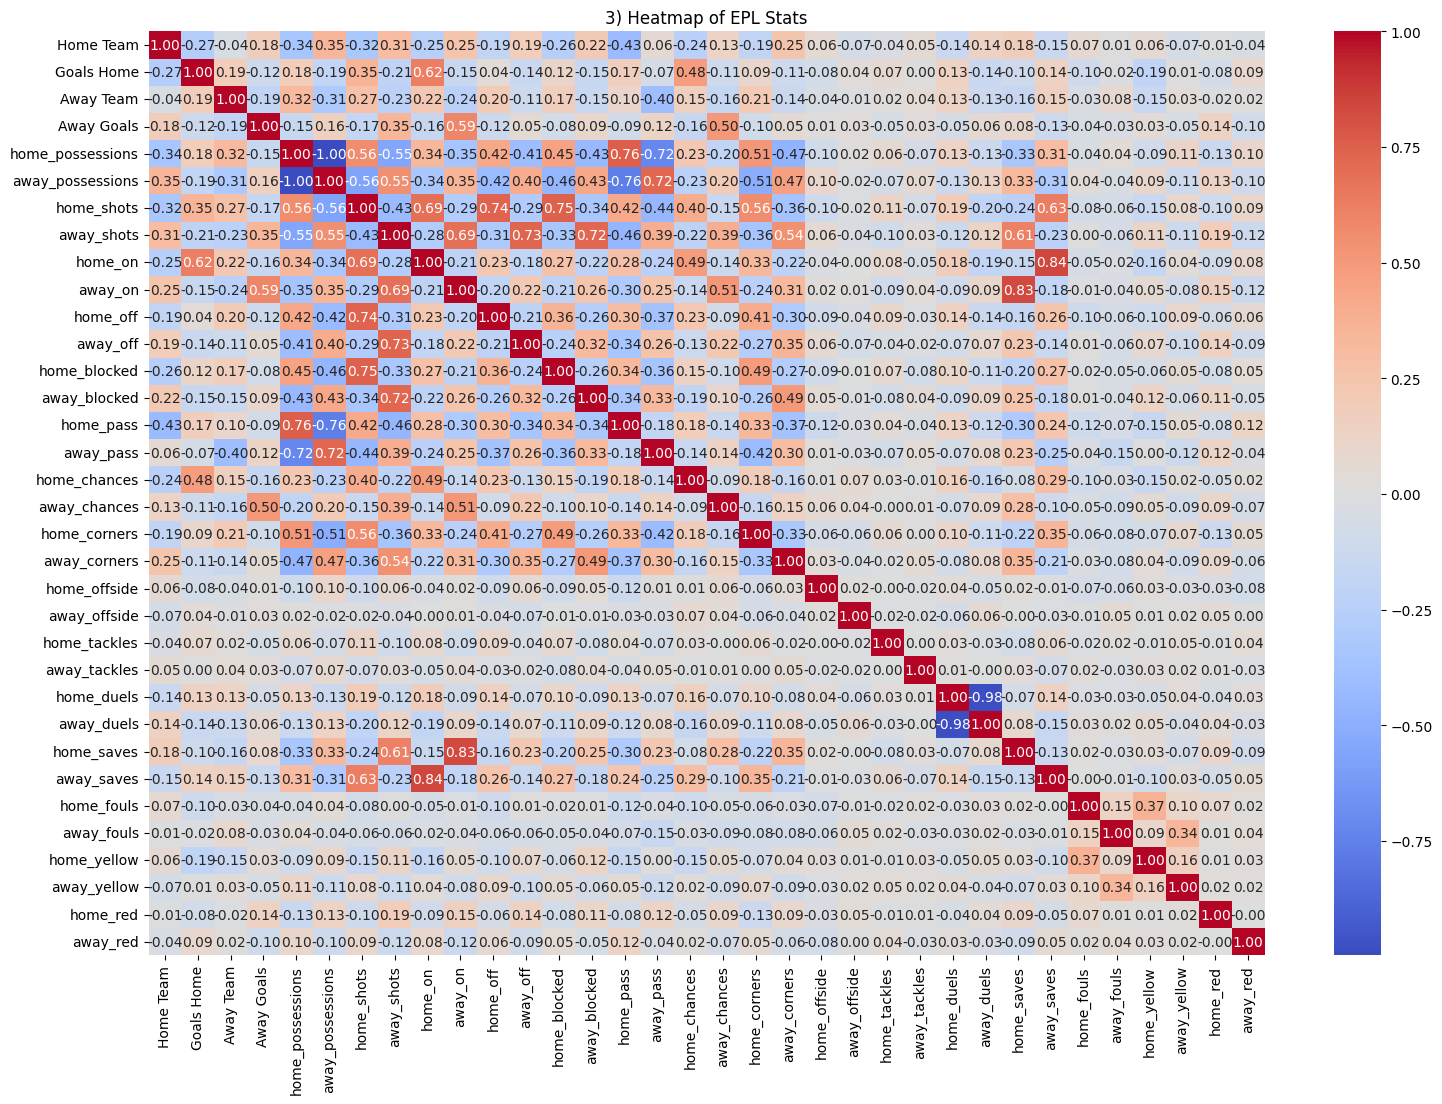

In [ ]:
plt.figure(figsize=(18,12))
df_epl_stats_numeric = df_epl_stats.select_dtypes(include=['int64','float64'])
sns.heatmap(df_epl_stats_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('3) Heatmap of EPL Stats')
plt.show()

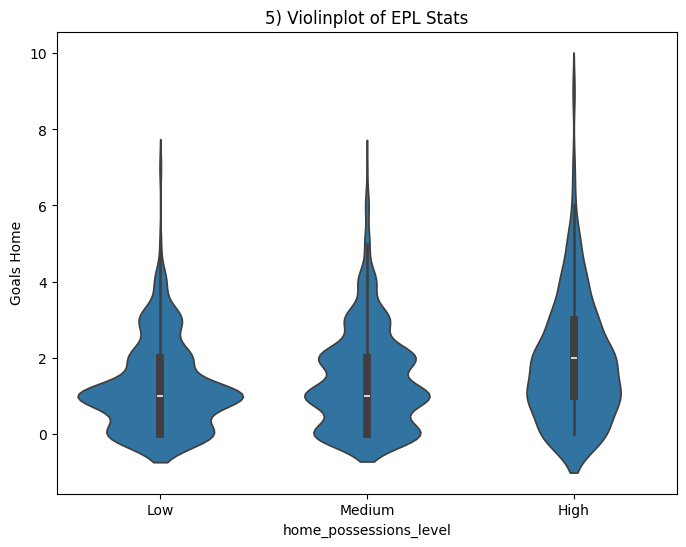

In [ ]:
df_epl_stats['home_possessions_level'] = pd.cut(df_epl_stats['home_possessions'], bins=[0,40,60,100], labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(8,6))
sns.violinplot(x='home_possessions_level', y='Goals Home', data=df_epl_stats)
plt.title('5) Violinplot of EPL Stats')
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_epl_stats['home_on'], df_epl_stats['Goals Home'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.62118581010892  with a P-value of P = 1.2570058600138946e-122


In [ ]:
corr_goals_shots = df_epl_stats[['Goals Home', 'home_on']].corr()
print(corr_goals_shots)

            Goals Home   home_on
Goals Home    1.000000  0.621186
home_on       0.621186  1.000000


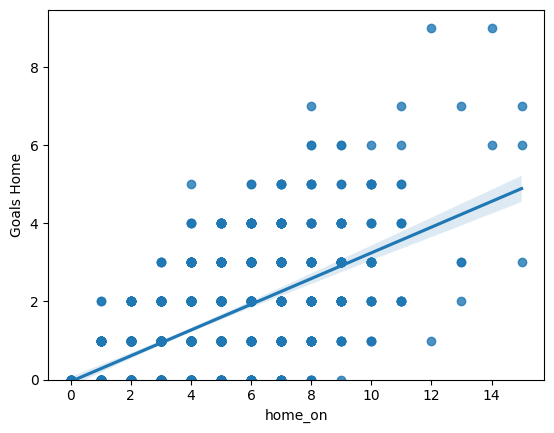

In [ ]:
sns.regplot(x="home_on", y="Goals Home", data=df_epl_stats)
plt.ylim(0,)
plt.show()

In [ ]:
corr_matrix = df_epl_stats_numeric.corr()

target_corr = corr_matrix['Goals Home'].sort_values(ascending=False)
print(target_corr)

Goals Home          1.000000
home_on             0.621186
home_chances        0.482039
home_shots          0.354652
Away Team           0.186964
home_possessions    0.184580
home_pass           0.171819
away_saves          0.142630
home_duels          0.134668
home_blocked        0.116458
home_corners        0.089137
away_red            0.085561
home_tackles        0.068596
home_off            0.038499
away_offside        0.036226
away_yellow         0.006982
away_tackles        0.004773
away_fouls         -0.021806
away_pass          -0.073604
home_red           -0.079354
home_offside       -0.081808
home_fouls         -0.100467
home_saves         -0.104451
away_chances       -0.107212
away_corners       -0.111282
Away Goals         -0.118525
away_off           -0.138538
away_duels         -0.140483
away_on            -0.150162
away_blocked       -0.153166
away_possessions   -0.185589
home_yellow        -0.194787
away_shots         -0.206330
Home Team          -0.269561
Name: Goals Ho

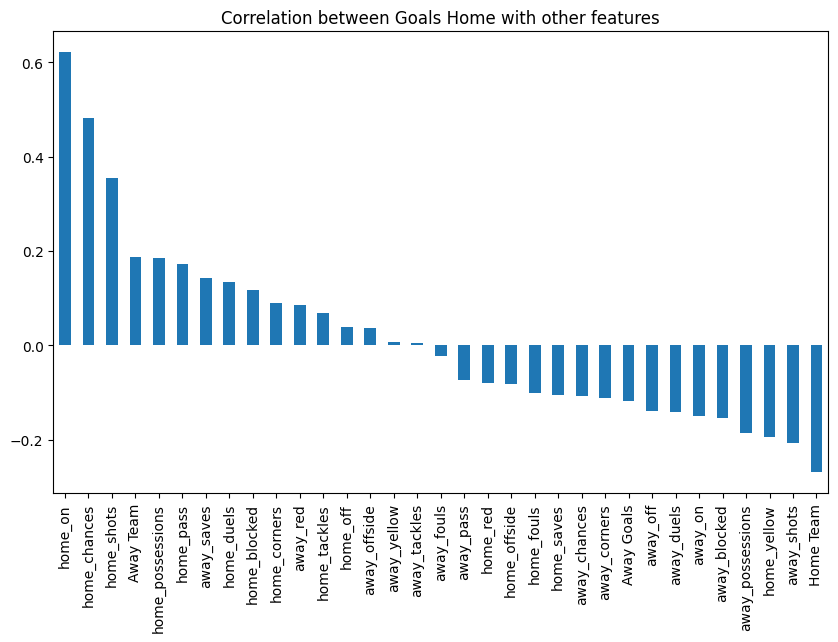

In [ ]:
plt.figure(figsize=(10,6))
target_corr.drop('Goals Home').plot(kind='bar')
plt.title("Correlation between Goals Home with other features")
plt.show()